In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set()
import csv

from PIL import Image, ImageDraw
import os
import shutil

from mpl_toolkits.basemap import Basemap

#there is currently a bug in panda's scatter_matrix that produces a warning that has no affect on what I'm doin :)
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [2]:
df = pd.read_csv('./Irma Storm centered/ATL_17_11_Irma_WWLLN_Locations.txt',header=None,names=["Year","Month","Day","Hour","Min","Sec","Lat","Long","Dist_East_West","Dist_North_South"],low_memory=False, delim_whitespace=True)
df.head()

,Year,Month,Day,Hour,Min,Sec,Lat,Long,Dist_East_West,Dist_North_South
0,2017,8,27,17,56,9.7207,12.7452,-13.4960,271.5710,138.4600
1,2017,8,27,17,56,19.4011,12.0782,-16.2206,-23.9866,64.2929
2,2017,8,27,17,56,36.8910,9.6958,-8.5119,820.7290,-200.6180
3,2017,8,27,17,56,42.7955,10.8790,-10.6200,587.4700,-69.0520
4,2017,8,27,17,56,46.1723,9.9119,-12.6214,370.0740,-176.5890


In [3]:
def GetHours(x):
    hours = int(x[0:2])
    return hours

def GetMinutes(x):
    minutes = int(x[3:5])
    return minutes

def GetSeconds(x):
    seconds = int(x[6:8])
    return seconds

def GetMicroseconds(x):
    ms = int(x[9:])
    return ms

def GetTotalMinute(x):
    hours = int(x[0:2])
    minutes = int(x[3:5])
    return 60 * hours + minutes

'''print("Rows: ", len(df))
df['Hours'] = df['Time'].apply(GetHours)
df['Minutes'] = df['Time'].apply(GetMinutes)
df['Seconds'] = df['Time'].apply(GetSeconds)
df['MicroSeconds'] = df['Time'].apply(GetMicroseconds)
df['TotalMinutes'] = df['Time'].apply(GetTotalMinute)

df.drop(df[df['TotalMinutes'] <= 30].index, inplace=True)
print("Rows: ", len(df))'''

'print("Rows: ", len(df))\ndf[\'Hours\'] = df[\'Time\'].apply(GetHours)\ndf[\'Minutes\'] = df[\'Time\'].apply(GetMinutes)\ndf[\'Seconds\'] = df[\'Time\'].apply(GetSeconds)\ndf[\'MicroSeconds\'] = df[\'Time\'].apply(GetMicroseconds)\ndf[\'TotalMinutes\'] = df[\'Time\'].apply(GetTotalMinute)\n\ndf.drop(df[df[\'TotalMinutes\'] <= 30].index, inplace=True)\nprint("Rows: ", len(df))'

In [4]:
df.dropna(axis=0,how='any',subset=['Lat','Long'],inplace=True)
df.head()

,Year,Month,Day,Hour,Min,Sec,Lat,Long,Dist_East_West,Dist_North_South
0,2017,8,27,17,56,9.7207,12.7452,-13.4960,271.5710,138.4600
1,2017,8,27,17,56,19.4011,12.0782,-16.2206,-23.9866,64.2929
2,2017,8,27,17,56,36.8910,9.6958,-8.5119,820.7290,-200.6180
3,2017,8,27,17,56,42.7955,10.8790,-10.6200,587.4700,-69.0520
4,2017,8,27,17,56,46.1723,9.9119,-12.6214,370.0740,-176.5890


In [5]:
coord_df = df.loc[:,['Lat','Long']]
coord_df.head()

,Lat,Long
0,12.7452,-13.4960
1,12.0782,-16.2206
2,9.6958,-8.5119
3,10.8790,-10.6200
4,9.9119,-12.6214


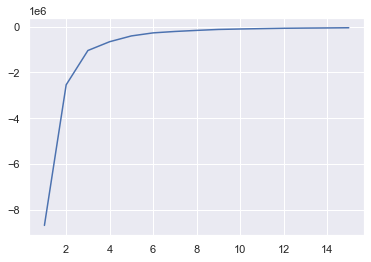

In [6]:
#elbow graph for visual estimation of ideal cluster count
clusters = range(1,16)

kmeans = [KMeans(n_clusters=i) for i in clusters]

y = df[['Lat']]
x = df[['Long']]

score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

plt.plot(clusters, score)

In [7]:
cluster_df = coord_df
for n_clusters in range(1,16):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(cluster_df)
    inertia = kmeans.inertia_
    print("Cluster count: ", n_clusters, "\tInertia: ", inertia)

Cluster count:  1 	Inertia:  77692757.44658689
Cluster count:  2 	Inertia:  27766019.977967966
Cluster count:  3 	Inertia:  14167777.086242558
Cluster count:  4 	Inertia:  10427114.359808393
Cluster count:  5 	Inertia:  7924460.720914274
Cluster count:  6 	Inertia:  6104743.92018685
Cluster count:  7 	Inertia:  5074277.949717058
Cluster count:  8 	Inertia:  4059360.1491999626
Cluster count:  9 	Inertia:  3502246.3225651616
Cluster count:  10 	Inertia:  2988186.1552900355
Cluster count:  11 	Inertia:  2627240.0894597895
Cluster count:  12 	Inertia:  2318050.417076921
Cluster count:  13 	Inertia:  2109331.3163033966
Cluster count:  14 	Inertia:  1916155.5641854391
Cluster count:  15 	Inertia:  1748189.1532758647


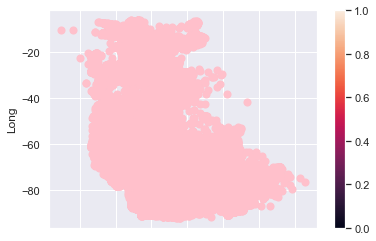

In [8]:
cluster_df.plot.scatter(x='Lat',y='Long', c='pink', s=50, cmap='spring')
plt.show()

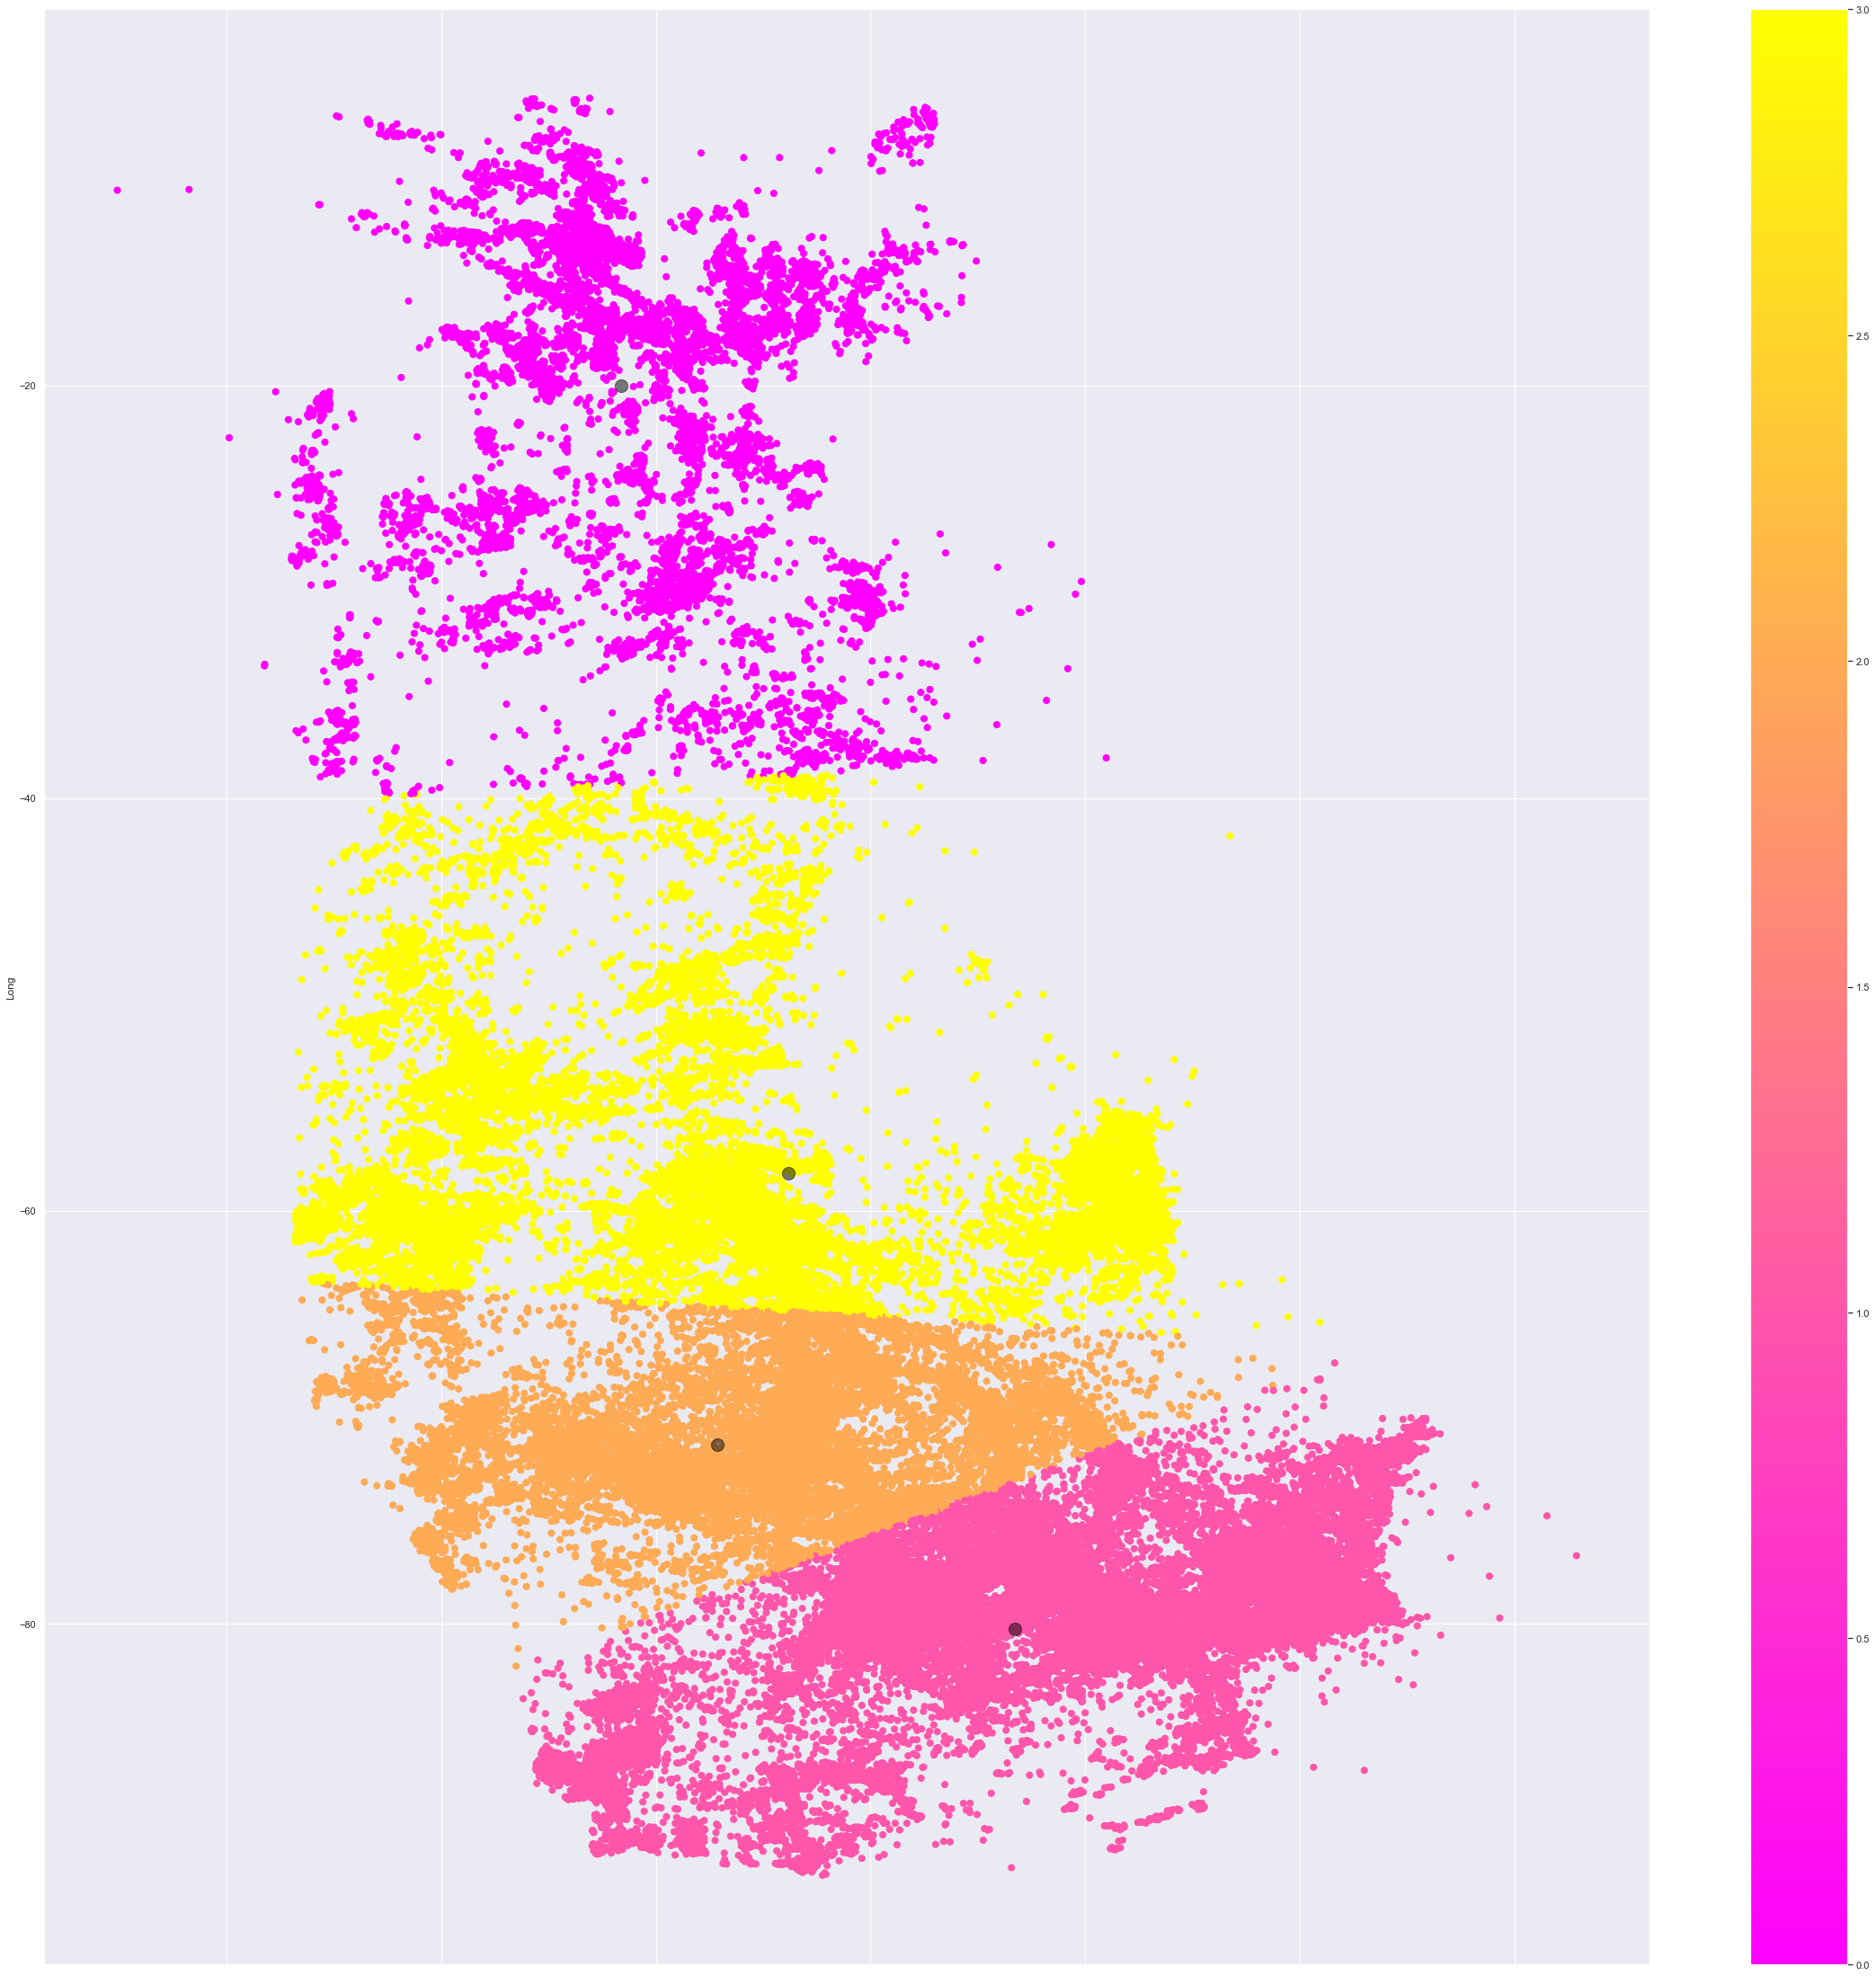

[[ 14.18466222 -20.01551351]
 [ 23.35635472 -80.29090973]
 [ 16.4372056  -71.35326111]
 [ 18.08755529 -58.18474966]]


In [9]:
#kmeans using the set cluster count
kmeans = KMeans(n_clusters=4, init='k-means++')
cluster_df = coord_df
kmeans.fit(cluster_df)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df)
inertia = kmeans.inertia_
labels = kmeans.predict(cluster_df[cluster_df.columns[:2]])
centers = kmeans.cluster_centers_

cluster_df.plot.scatter(x='Lat',y='Long', c=labels, s=50, cmap='spring', figsize=(40,40))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s= 200, alpha=.5)

plt.show()

print(centers)

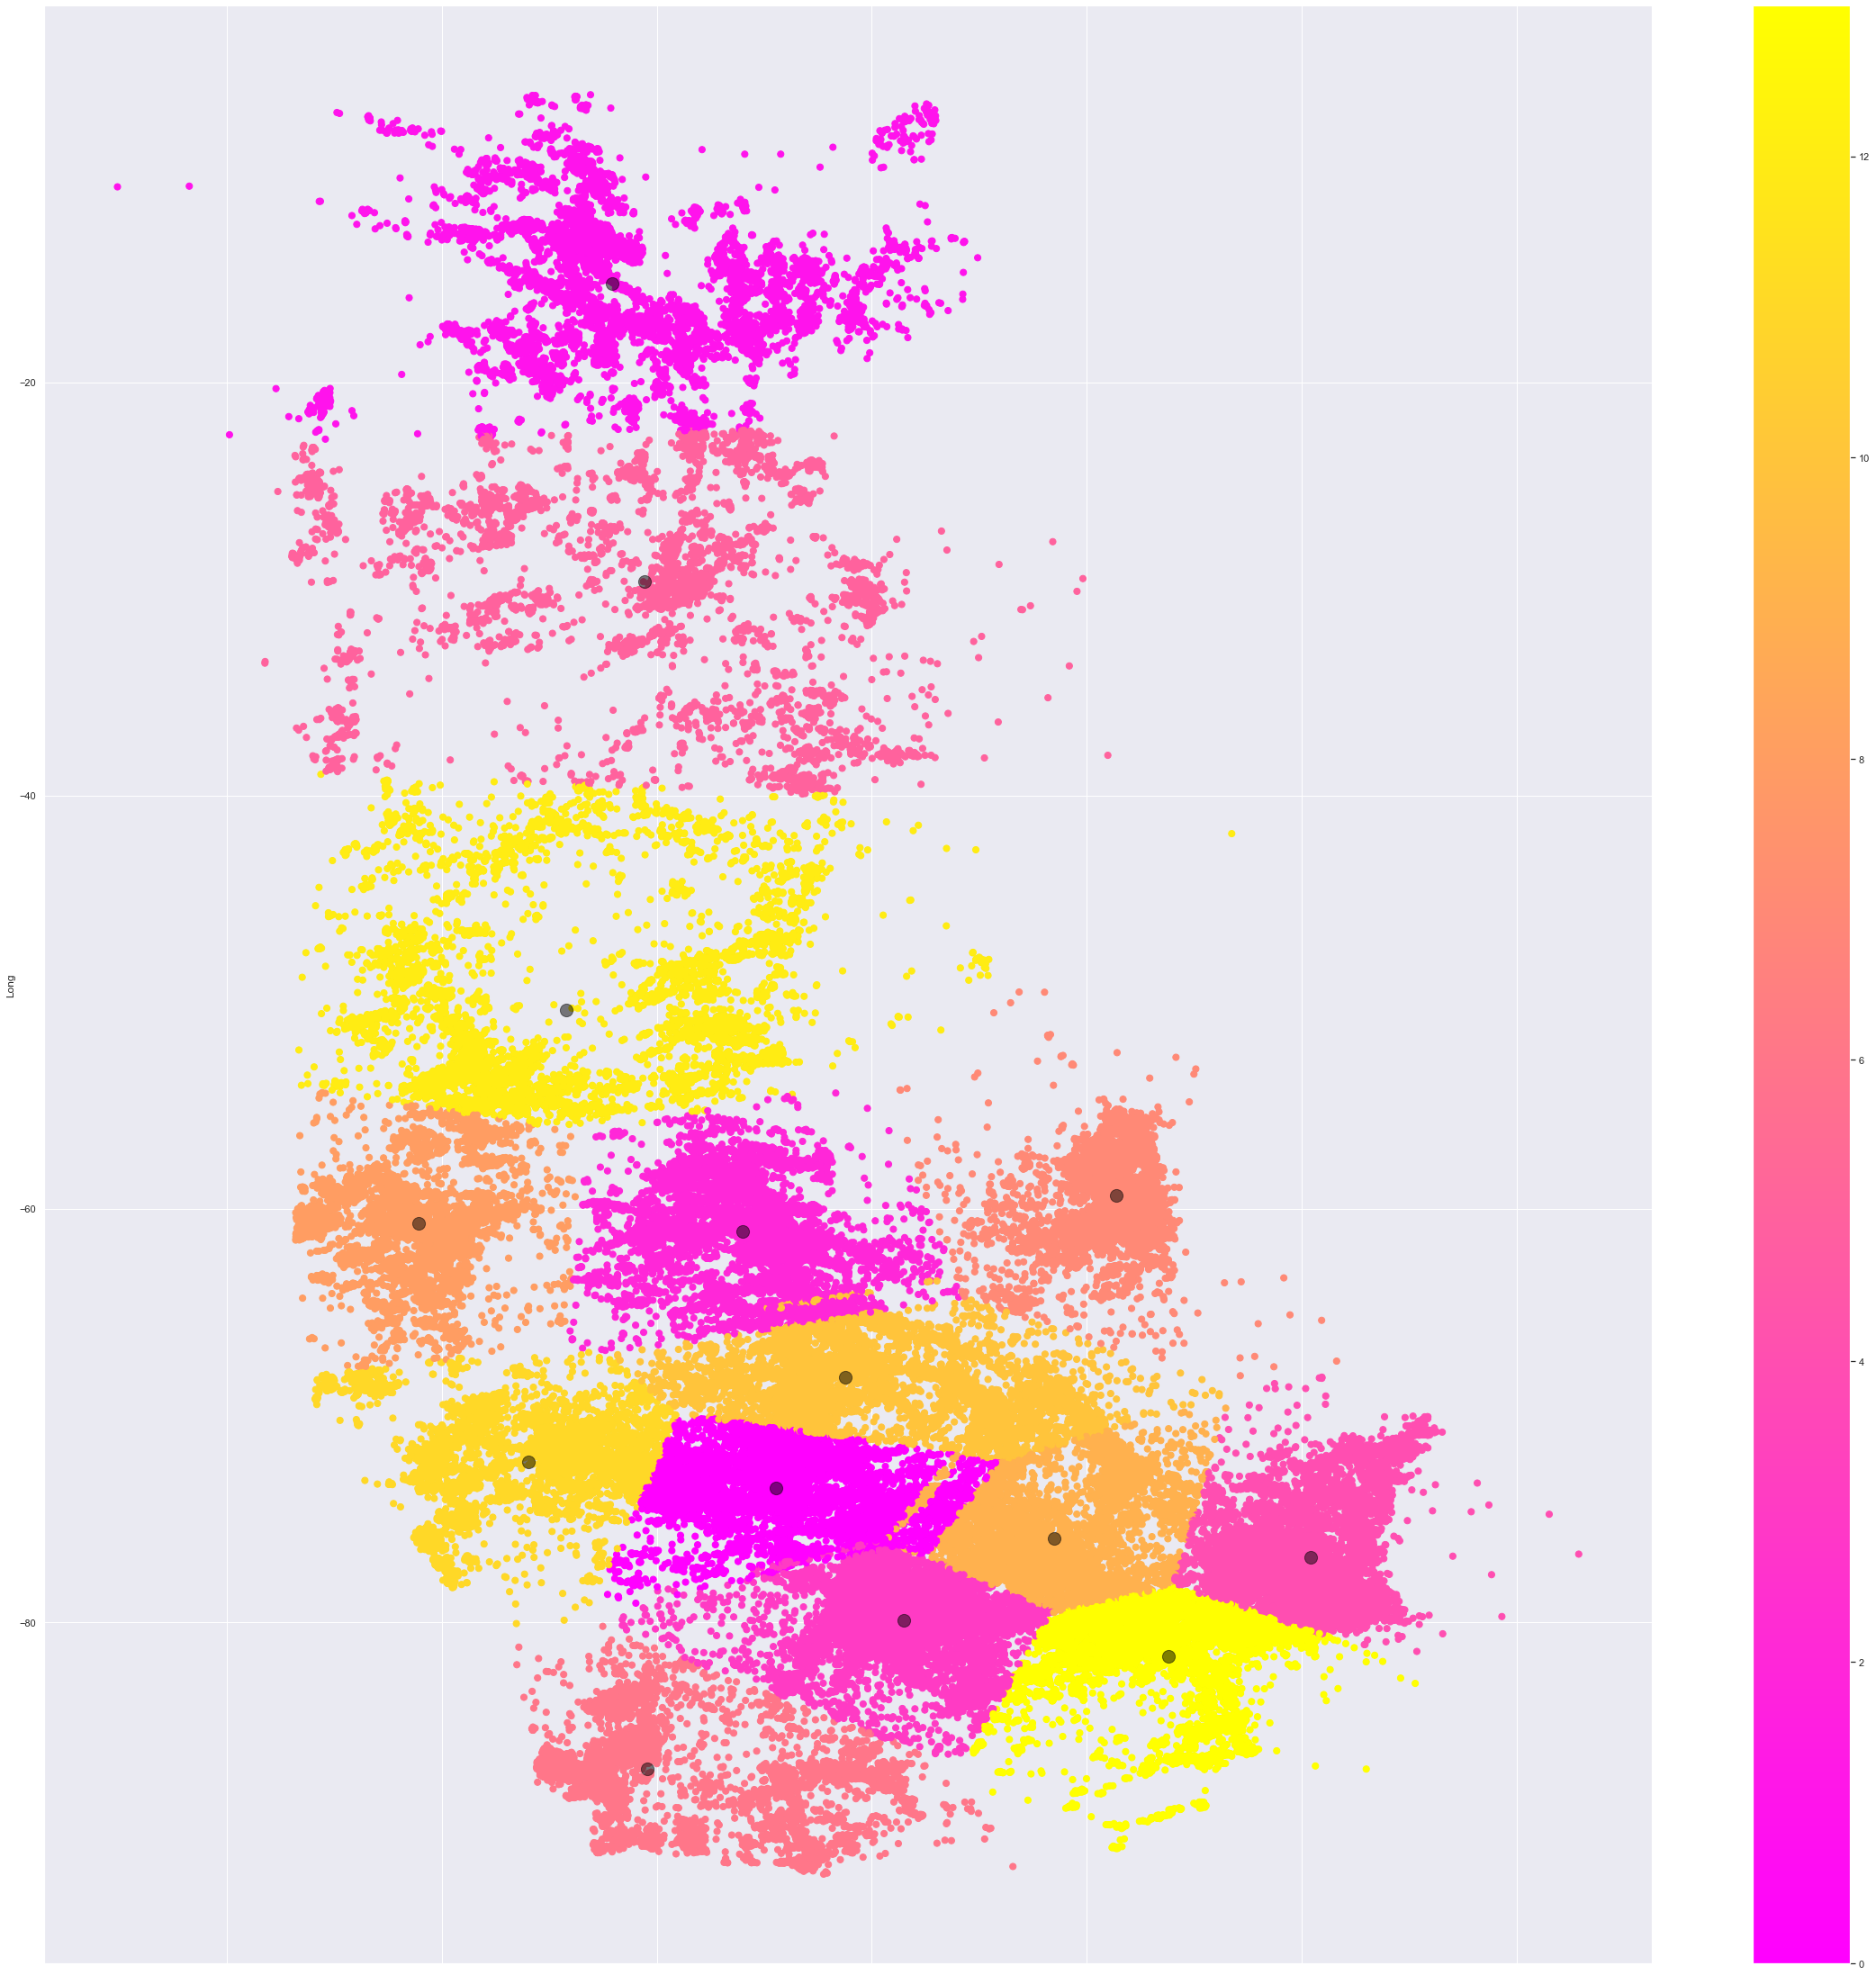

In [10]:
#kmeans using the set cluster count
kmeans = KMeans(n_clusters=14, init='k-means++')
cluster_df = coord_df
kmeans.fit(cluster_df)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df)
inertia = kmeans.inertia_
labels = kmeans.predict(cluster_df[cluster_df.columns[:]])
centers = kmeans.cluster_centers_

cluster_df.plot.scatter(x='Lat',y='Long', c=labels, s=50, cmap='spring', figsize=(40,40))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s= 200, alpha=.5)

plt.show()